# Statystyczne metody przetwarzania danych 

## Laboratorium 1 - algorytm Najbliższego Sąsiada (NN)


### Opis

Celem jest zbadanie danych i opracowanie algorytmu klasyfikacji liści. Do tego celu należy zaimplementować i zastosować klasyfikator najbliższego sąsiada - NN (Nearest Neighbor).

### Termin
Zadanie należy wykonać w trakcie trwania laboratorium.

### System oceniania

| Liczba punktów (procentowo) | Ocena |
| :----                    | ---: |
| [0-50)   | 2   |
| [50-60)  | 3   |
| [60-70)  | 3.5 |
| [70-80)  | 4   |
| [80-90)  | 4.5 |
| [90-100] | 5   |

<u>Punkty ujemne</u>

* `ocena - 0.5` jeżeli zadanie wysłano po laboratorium, ale < 7 dni; 
* `ocena - 1` jeżeli zadanie wysłano w terminie pomiędzy 7 a 14 dni;
* `ocena - 1.5` jeżeli zadanie wysłano po upływie 14 dni, ale przed ostatnim laboratorium;
* `ocena = 2` jeżeli zadanie wysłano po ostatnim laboratorium.

<u>Uwaga:</u>

Niedopuszczalne jest dzielenie się notatnikiem (plik `.ipynb`) z innymi studentami ani udostępnianie go w Internecie. Każdy student powinien pobrać notatnik samodzielnie z platformy WIKAMP.
Wysyłając zadanie potwierdasz, że wykonałeś je samodzielnie i jest to Twoja indywidualna praca a materiał przedstawiony w tej pracy jest dla Ciebie zrozumiały. Prace bardzo podobne albo grupowe będą uznawane za plagiat.


### Zbiór danych

Zbiór danych znajduje się w katalogu `dataset/*`. Jest to zmodyfikowany zbiór danych znajdujący się pod adresem: <https://archive.ics.uci.edu/ml/datasets/leaf>.

### Przesyłanie zadań

Wszystkie pliki należy spakować archiwizatorem **zip** i przesłać za pośrednictwem platformy WIKAMP. Poniżej oczekiwana zawartość archiwum:

```
+-- 📂 [IMIE.NAZWISKO].zip
    +-- 📜 Lab01.ipynb
    +-- 📂 dataset
        +-- 📜 dataset.npz
        +-- 📜 ReadMe.pdf
```

### Dodatkowe narzędzia

Dopuszczalne jest korzystanie z bibliotek: `numpy`, `pandas`, `matplotlib`.
Implementacja klasyfikatora powinna być wykonana samodzielnie (bez dodatkowych bibliotek).



### Zadanie 1

Wczytaj dane z pliku `dataset.npz`. Plik ten zawiera zbiór danych podzielony na dwa podzbiory: treningowy `train` i testowy `test`. Każdy z nich zawiera cechy oraz indeksy klas. Dokładny opis zbioru danych znajduje się w pliku `ReadMe.pdf`.

> Podpowiedź: Możesz wykorzystać poniższy kod:
```python
with open('./dataset/dataset.npz', 'rb') as f:
    data = np.load(f)
    train, test = data['train'], data['test']
```

In [6]:
# ignore 2nd attribute
import numpy as np
with open('./dataset/dataset.npz', 'rb') as f:
    data = np.load(f, allow_pickle=True)
    train, test = data['train'], data['test']
print(train.shape)


(2244, 16)


### Zadanie 2

Sprawdź: 
* ile jest wszystkich próbek z zbiorze, 
* ile jest próbek w poszczegónych klasach.

Czy zauważyłeś jakieś problemy związane z tym zbiorem danych?

In [23]:
totalSamplesCount = train.shape[0]
CLASS_COUNT = 40
samplesInClasses = np.zeros((CLASS_COUNT,1))
print(np.max(train[:,0]))
print(np.min(train[:,0]))

for sample in train:
    samplesInClasses[int(sample[0])-1] += 1
    
print(f"W zbiorze jest {totalSamplesCount} próbek.")
print(f"W posczególnych klasach jest")
for classIndex, count in enumerate(samplesInClasses):
    print(f"{int(classIndex+1)}: {int(count)}")
"""
Klasy 16-21 oraz 37-40 nie mają próbek. Niektóre klasy mają znacznie więcej próbek niż inne.

"""

36.0
1.0
W zbiorze jest 2244 próbek.
W posczególnych klasach jest
1: 77
2: 66
3: 55
4: 66
5: 77
6: 44
7: 44
8: 33
9: 121
10: 88
11: 88
12: 77
13: 99
14: 66
15: 66
16: 0
17: 0
18: 0
19: 0
20: 0
21: 0
22: 121
23: 77
24: 77
25: 66
26: 99
27: 55
28: 66
29: 110
30: 77
31: 77
32: 66
33: 66
34: 99
35: 88
36: 33
37: 0
38: 0
39: 0
40: 0


'\nKlasy 16-21 oraz 37-40 nie mają próbek. Niektóre klasy mają znacznie więcej próbek niż inne.\n\n'

### Zadanie 3

Wybierz obserwacje należące do poniższych klas (rodzaje liści):
* `Populus nigra` - klasa nr 3, 
* `Quercus robur` - klasa nr 5.


In [41]:
classIndexes = []
for i in range(CLASS_COUNT):
    classIndexes.append([])
for i, sample in enumerate(train):
    classIndexes[int(sample[0]-1)].append(int(i))
"""
for i, sampleClass in enumerate(classIndexes):
    print(i,len(sampleClass))
"""
populus_nigra = train[classIndexes[2],:]
quercus_robur = train[classIndexes[4],:]
print(populus_nigra.shape)
print(quercus_robur.shape)

(55, 16)
(77, 16)


### Zadanie 4

A) Wybierz dwie dowolne cechy (*features*).<br />
B) Przedstaw graficznie próbki - na osi X i Y wartości wybranych wyżej cech.

Poniższy kod importuje kolekcję funkcji przydatnych do wizualizacji z biblioteki `matplotlib` (*info: zwróć uwagę, że nadano alias `plt`*).

```python
import matplotlib.pyplot as plt
```

Możesz wykorzystać funkcje `plt.figure`, `plt.scatter`, `plt.legend`, `plt.title`, `plt.xlabel` i `plt.ylabel` w celu wykonania tego zadania.

* Scatter: <https://matplotlib.org/3.3.3/api/_as_gen/matplotlib.pyplot.scatter.html>
* Pyplot: <https://matplotlib.org/tutorials/introductory/pyplot.html>

>Ważne: Pamiętaj, że każdy przedstawiony wykres powinien być czytelny i posiadać następujące elementy:
* tytuł,
* opisy wszystkich osi,
* legendę.

> **Przykład**:
```python
import matplotlib.pyplot as plt
import numpy as np
plt.figure()
plt.title("Próbki")
plt.xlabel(f"Cecha 1")
plt.ylabel(f"Cecha 2")
samples = np.random.rand(2, 20, 2)
samples[0] = samples[0]-0.5
samples[1] = samples[1]+0.5
for idx, sample in enumerate(samples):
    plt.scatter(x=sample[:, 0], y=sample[:, 1], label=idx)
plt.legend()
```
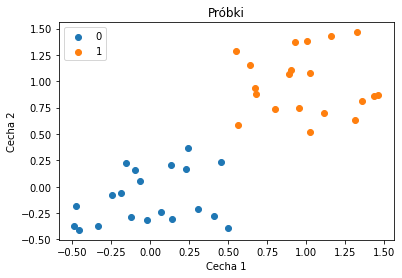


Chose attributes Elongation, Entropy


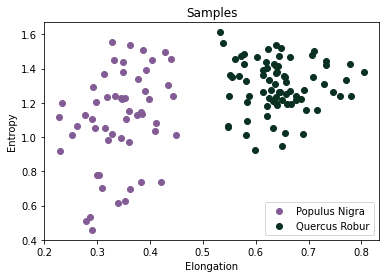

In [165]:
import matplotlib.pyplot as plt
import random

def randomColor():
    return ('#%02X%02X%02X' % (random.randint(0,255),random.randint(0,255),random.randint(0,255)))

ATTRIBUTE_NAMES = ["Class", "Specimen No.", "Eccentricity", "Aspect Ratio", "Elongation", "Solidity", "Stochastic Convexity", "Isoperimetric Factor", "Maximal Indentation Depth", "Lobedness", "Average Intensity", "Average Contrast", "Smoothness", "Third moment", "Uniformity", "Entropy"]
CLASS_NAMES = \
"""Quercus suber 
Salix atrocinera 
Populus nigra 
Alnus sp. 
Quercus robur 
Crataegus monogyna 
Ilex aquifolium 
Nerium oleander 
Betula pubescens 
Tilia tomentosa 
Acer palmatum 
Celtis sp. 
Corylus avellana 
Castanea sativa 
Populus alba 
Acer negundo 
Taxus bacatta 
Papaver sp. 
Polypolium vulgare 
Pinus sp. 
Fraxinus sp. 
Primula vulgaris 
Erodium sp. 
Bougainvillea sp. 
Arisarum vulgare 
Euonymus japonicus 
Ilex perado ssp. azorica 
Magnolia soulangeana 
Buxus sempervirens 
Urtica dioica 
Podocarpus sp. 
Acca sellowiana 
Hydrangea sp. 
Pseudosasa japonica 
Magnolia grandiflora 
Geranium sp. 
Aesculus californica 
Chelidonium majus 
Schinus terebinthifolius 
Fragaria vesca """.split("\n")
#CHOSEN_ATTRIBUTE_INDEXES = [random.randint(2,15),random.randint(2,15)]
CHOSEN_ATTRIBUTE_INDEXES = [4,15]
print(f"Chose attributes {ATTRIBUTE_NAMES[CHOSEN_ATTRIBUTE_INDEXES[0]]}, {ATTRIBUTE_NAMES[CHOSEN_ATTRIBUTE_INDEXES[1]]}")
CLASS_COLORS = [randomColor() for _ in range(len(classIndexes)) ]
#print(len(CLASS_COLORS))

def normalize(arr):
    cp = np.copy(arr)
    ptp = arr.ptp()
    amin = arr.min()
    #for i, s in enumerate(arr):
    #   cp[i] = (s - amin) / ptp
    return cp

plt.figure()
plt.title("Samples")
plt.xlabel(ATTRIBUTE_NAMES[CHOSEN_ATTRIBUTE_INDEXES[0]])
plt.ylabel(ATTRIBUTE_NAMES[CHOSEN_ATTRIBUTE_INDEXES[1]])
#print(populus_nigra[:,3])
#populus_nigra, quercus_robur

plt.scatter(
    x=(populus_nigra[:,CHOSEN_ATTRIBUTE_INDEXES[0]]),
    y=(populus_nigra[:,CHOSEN_ATTRIBUTE_INDEXES[1]]),
    label="Populus Nigra",
    c=CLASS_COLORS[2]
)
plt.scatter(
    x=(quercus_robur[:,CHOSEN_ATTRIBUTE_INDEXES[0]]),
    y=(quercus_robur[:,CHOSEN_ATTRIBUTE_INDEXES[1]]),
    label="Quercus Robur",
    c=CLASS_COLORS[4]
)
plt.legend()

    

### Zadanie 5

Zaimplementuj klasyfikator najbliższego sąsiada NN i uruchom predykcję na zbiorze testowym.

> Podpowiedź: Dla każdej obserwacji ze zbioru `test` należy odnaleźć najbliższego sąsiada w zbiorze `train` i zaklasyfikować obserwację do klasy najbliższego sąsiada.


In [166]:
def euclideanDistance(sampleA, sampleB, attrIndices):
    sqSum = 0
    for ind in attrIndices:
        sqSum += (sampleA[ind] - sampleB[ind])**2
    sqSum = np.sqrt(sqSum)
    return sqSum
    
def assignNN(sample, trainedSamples, attrIndices):
    minDist = euclideanDistance(sample, trainedSamples[0], attrIndices)
    nnIndex = 0
    for i, trainedSample in enumerate(trainedSamples):
        dst = euclideanDistance(sample, trainedSamples[i], attrIndices)
        if(dst<minDist):
            minDist = dst
            nnIndex = i
    return trainedSamples[nnIndex]
"""
print(train.shape)
print(quercus_robur.shape)
print(populus_nigra.shape)
print(np.concatenate((quercus_robur, populus_nigra), axis=0).shape)
"""
nearestNeighbours = [None for _ in range(test.shape[0])]
for i, sample in enumerate(test):
    nearestNeighbours[i] = assignNN(sample, np.concatenate((quercus_robur, populus_nigra), axis=0), CHOSEN_ATTRIBUTE_INDEXES)


### Zadanie 6

Wyświetl wyniki klasyfikacji (próbki treningowe i testowe), każda klasa w innym kolorze a próbki testowe innym "markerem".

> Wykorzystaj parametry: `facecolors`, `edgecolors`, `marker` i `c` funkcji `scatter`.

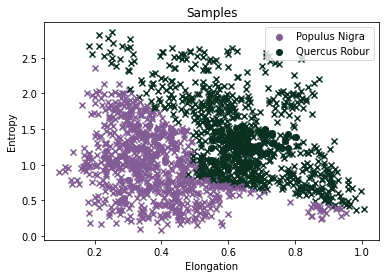

In [167]:
plt.figure()
plt.title("Samples")
plt.xlabel(ATTRIBUTE_NAMES[CHOSEN_ATTRIBUTE_INDEXES[0]])
plt.ylabel(ATTRIBUTE_NAMES[CHOSEN_ATTRIBUTE_INDEXES[1]])
#print(populus_nigra[:,3])
#populus_nigra, quercus_robur
plt.scatter(
    x=populus_nigra[:,CHOSEN_ATTRIBUTE_INDEXES[0]],
    y=populus_nigra[:,CHOSEN_ATTRIBUTE_INDEXES[1]],
    label="Populus Nigra",
    c=CLASS_COLORS[2]
)
plt.scatter(
    x=quercus_robur[:,CHOSEN_ATTRIBUTE_INDEXES[0]],
    y=quercus_robur[:,CHOSEN_ATTRIBUTE_INDEXES[1]],
    label="Quercus Robur",
    c=CLASS_COLORS[4]
)
for i, sample in enumerate(test[:]):   
    nnClassIndex = int(nearestNeighbours[i][0])-1
    plt.scatter(
        x=sample[CHOSEN_ATTRIBUTE_INDEXES[0]],
        y=sample[CHOSEN_ATTRIBUTE_INDEXES[1]],
        #label="Test",
        marker="x",
        c=CLASS_COLORS[nnClassIndex]
    )
plt.legend()

### Zadanie 7

Oblicz dokładność (*Accuracy*) klasyfikacji (stosunek poprawnie zaklasyfikowanych próbek do liczby wszystkich próbek wyrażony procentowo).

$$
\texttt{Accuracy} = \frac{T}{N}
$$

gdzie $T$ - liczba poprawnie zaklasyfikowanych próbek, $N$ - liczba wszystkich próbek.


In [168]:
totalTestSamples = test.shape[0]
correctSamples = 0
for i, sample in enumerate(test):
    if(nearestNeighbours[i][0] == sample[0]): correctSamples+=1

print("Accuracy: {:.2f}%".format(correctSamples/totalTestSamples*100))


Accuracy: 7.35%


### Zadanie 8

Wybierz 5 dowolnych rodzajów liści (klasy) i przeprowadź eksperyment ponownie.

> Możesz połączyć wszystkie powyższe fragmenty kodu w wkleić w komórkę poniżej zmieniając liczbę klas.

In [169]:
CHOSEN_CLASS_INDICES = [22, 23, 24, 25, 26]

CHOSEN_SAMPLES = np.concatenate(
    [train[classIndexes[i],:] for i in CHOSEN_CLASS_INDICES],
    axis=0
)
print(CHOSEN_SAMPLES.shape)


newNearestNeighbours = [None for _ in range(test.shape[0])]
for i, sample in enumerate(test):
    newNearestNeighbours[i] = assignNN(sample, CHOSEN_SAMPLES, CHOSEN_ATTRIBUTE_INDEXES)
    
totalTestSamples = test.shape[0]
correctSamples = 0
for i, sample in enumerate(test):
    if(newNearestNeighbours[i][0] == sample[0]): correctSamples+=1

print("Accuracy: {:.2f}%".format(correctSamples/totalTestSamples*100))



(374, 16)
Accuracy: 7.55%


### Zadanie 9

Przeprowadź eksperyment ponownie dla większej liczby cech.

In [170]:
z9_CHOSEN_ATTRIBUTE_INDEXES = [4,7,9,11,13]

z9_nearestNeighbours = [None for _ in range(test.shape[0])]
for i, sample in enumerate(test):
    z9_nearestNeighbours[i] = assignNN(sample, CHOSEN_SAMPLES, z9_CHOSEN_ATTRIBUTE_INDEXES)
        
totalTestSamples = test.shape[0]
correctSamples = 0
for i, sample in enumerate(test):
    if(z9_nearestNeighbours[i][0] == sample[0]): correctSamples+=1

print("Accuracy: {:.2f}%".format(correctSamples/totalTestSamples*100))


Accuracy: 9.56%


### Zadanie 10

Napisz wnioski z przeprowadzonego eksperymentu.

In [ ]:
"""
Przeanalizowanie uzyskanych wyników wydaje się sugerować iż stosowanie metody Nearest Neighbour nie daje najlepszych rezultatów
dla użytych próbek i parametrów. Przy próbie przypisania testowego zestawu do 2 klas uzyskano poprawnośc na poziomie zaledwie 
7.35%. Zwiększenie ilości klas do których przypisywane były liście poprawiło sytuacje o mniej niż 1%. Dopiero zwiększenie liczby
cech do 5 podniosło skuteczność algorytmu do prawie 10%. Może to wskazywać na niedyskryminatywność początkowo wybranych 2 cech.

Należy jednak wziąć pod uwagę fakt, iż, liczba ta dotyczy próby klasyfikacji liści pochodzących z 40 klas na podstawie danych
pochodzących jedynie z 30 z nich. 10 z klas, które potencjalnie mogły znaleźć się w zbiorze testowym nie posiada żadnych próbek
w zbiorze wykorzystanym do uczenia. Nawet jeśli nie miało to miejsca, próba przypisania obiektów z 30 klas
do jedynie 5 na podstawie 5 z 16 dostępnych parametrów, mogła nie dać najlepszych rezultatów.

Ze względu na brak wiedzy z zakresu charakteryzowania liści oraz ograniczone ramy czasowe wykonania zadania atrybuty oraz klasy,
wykorzystane do klasyfikacji wybrano w sposób prawie losowy. Dodatkowo, wartości cech nie były normalizowane ani ważone, 
dając wyższe znaczenie tym atrybutom które osiągały wyższe wartości absolutne.
"""